# Titanic Dataset

# Part 1 - DEFINE

## ---- 1 Define the problem ----

This script pulls in titanic dataset, builds and tests several predictive models, and then identifies the best model.


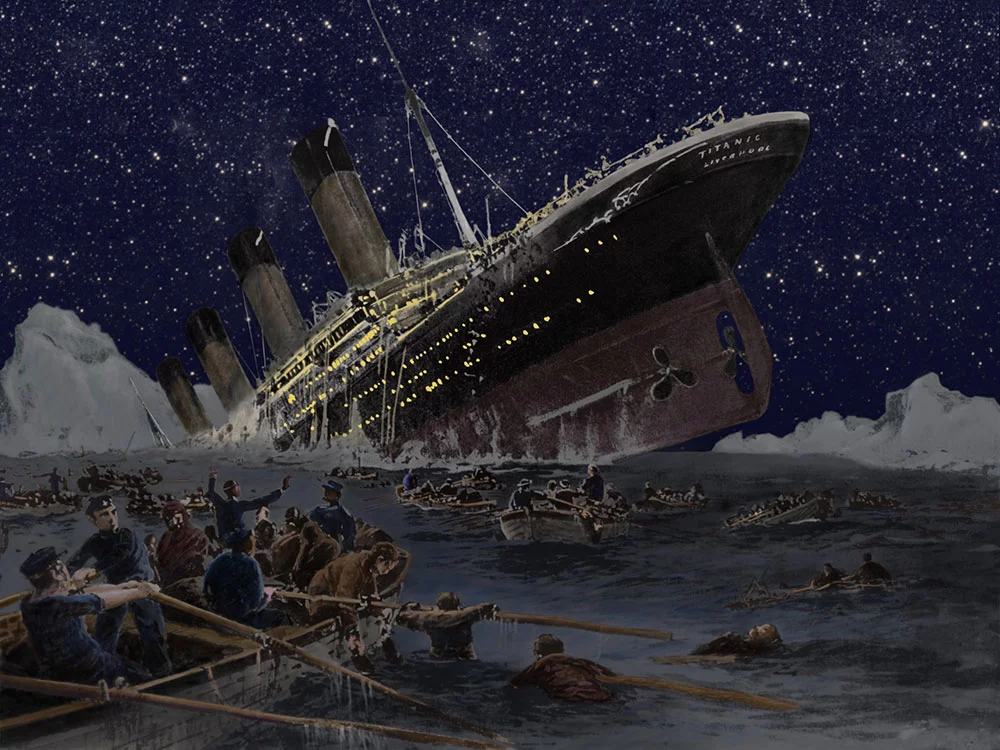

# Part 2 - DISCOVER

##  ---- 2 Load the data ----

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
def load_file(df):
    return pd.read_csv(df)

In [3]:
df = "C:\\Users\\mauli\\OneDrive\\Desktop\\DS\\Projects\\DS Projects\\titanic\\train.csv"

In [4]:
titanic = load_file(df)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Examine the data

In [5]:
titanic.shape

(891, 12)

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].mean())

In [9]:
titanic.groupby(titanic["Cabin"].isnull())["Survived"].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [10]:
titanic["Cabin"] = np.where(titanic["Cabin"].isnull(), 0, 1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


## ---- 3 Explore the data (EDA) ----

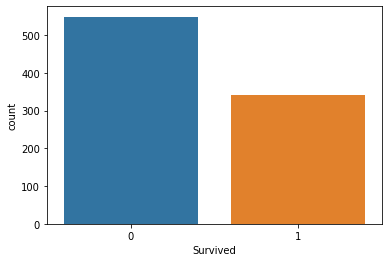

In [11]:
sns.countplot(x="Survived",data=titanic)

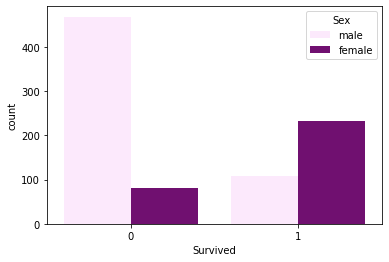

In [12]:
sns.countplot(x="Survived",hue="Sex",data=titanic,color="purple")

The number of males lost the life are five times higher than the female lost in the Titanic. Besides, the number of female who were saved are double than the number of males.

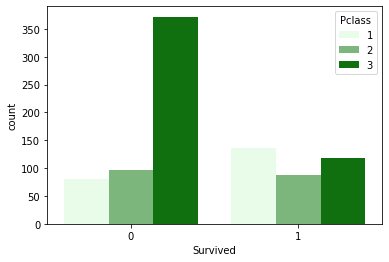

In [13]:
sns.countplot(x="Survived",hue="Pclass",data=titanic,color="green")

The highest people who lost the life were in class 3. It could be because they were not priortized at the time of rescuing people.

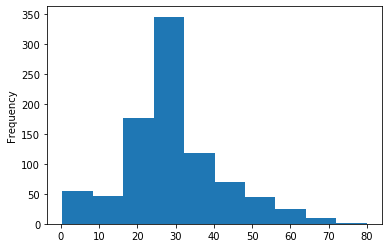

In [14]:
titanic["Age"].plot.hist()

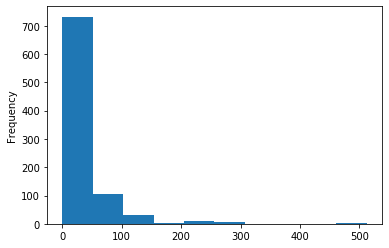

In [15]:
titanic["Fare"].plot.hist()

The fare of majority people was between 0 and 50.

## ---- 4 Clean the data ----

In [16]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [17]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null int32
Embarked       889 non-null object
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 80.2+ KB


### Drop Unnecessary Columns

In [18]:
titanic.drop(["PassengerId","Name","Ticket","Embarked"],axis=1,inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,male,22.0,1,0,7.2500,0
1,1,1,female,38.0,1,0,71.2833,1
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,1
4,0,3,male,35.0,0,0,8.0500,0


In [19]:
gender = {'male':0, 'female':1}
titanic["Sex"] = titanic["Sex"].map(gender)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,0


In [20]:
pcl = pd.get_dummies(titanic["Pclass"], drop_first=True)
pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [21]:
titanic = pd.concat([titanic,pcl],axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,2,3
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,1,0,0
4,0,3,0,35.0,0,0,8.0500,0,0,1


In [22]:
titanic.drop(["Pclass"],axis=1,inplace=True)
titanic.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,2,3
0,0,0,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0
2,1,1,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0
4,0,0,35.0,0,0,8.0500,0,0,1


## Split data into train and test data set

In [23]:
X = titanic.drop("Survived", axis=1)
y = titanic["Survived"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
def print_results(results):
    print("Best Parameters: {}".format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

# Part 3 - DEVELOP

## ---- 5 Create Models ----

### Logistic Regression

In [26]:
lr = LogisticRegression()
parameters = {
    'C': [0.05, 0.5, 0.1, 1, 5, 10, 50]
}
cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(X, y.values.ravel())
print_results(cv)

Best Parameters: {'C': 0.5}
0.79 (+/-0.046) for {'C': 0.05}
0.802 (+/-0.034) for {'C': 0.5}
0.792 (+/-0.036) for {'C': 0.1}
0.801 (+/-0.035) for {'C': 1}
0.798 (+/-0.032) for {'C': 5}
0.799 (+/-0.03) for {'C': 10}
0.799 (+/-0.03) for {'C': 50}


In [27]:
cv.best_estimator_

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
joblib.dump(cv.best_estimator_, 'C:\\Users\\mauli\\OneDrive\\Desktop\\DS\\Projects\\DS Projects\\titanic\\LR_model.pkl')

['C:\\Users\\mauli\\OneDrive\\Desktop\\DS\\Projects\\DS Projects\\titanic\\LR_model.pkl']

### Support Vector Machine

In [29]:
svc = SVC()
parameters = {
    'kernel':['linear','rbf'],
    'C':[0.1, 0.5, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(X,y.values.ravel())
print_results(cv)

Best Parameters: {'C': 0.1, 'kernel': 'linear'}
0.788 (+/-0.04) for {'C': 0.1, 'kernel': 'linear'}
0.616 (+/-0.003) for {'C': 0.1, 'kernel': 'rbf'}
0.788 (+/-0.04) for {'C': 0.5, 'kernel': 'linear'}
0.645 (+/-0.102) for {'C': 0.5, 'kernel': 'rbf'}
0.788 (+/-0.04) for {'C': 1, 'kernel': 'linear'}
0.69 (+/-0.119) for {'C': 1, 'kernel': 'rbf'}
0.788 (+/-0.04) for {'C': 10, 'kernel': 'linear'}
0.708 (+/-0.035) for {'C': 10, 'kernel': 'rbf'}


In [30]:
cv.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [31]:
joblib.dump(cv.best_estimator_, 'C:\\Users\\mauli\\OneDrive\\Desktop\\DS\\Projects\\DS Projects\\titanic\\SVM_model.pkl')

['C:\\Users\\mauli\\OneDrive\\Desktop\\DS\\Projects\\DS Projects\\titanic\\SVM_model.pkl']

### Multi Layer Perceptron

In [32]:
mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(10,),(50,),(100,)],
    'activation':['relu','tanh','logistic'],
    'learning_rate':['constant','invscaling','adaptive']
}

cv = GridSearchCV(mlp, parameters, cv=5)
cv.fit(X,y.values.ravel())
print_results(cv)

C:\Users\mauli\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mauli\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mauli\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mauli\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.752 (+/-0.138) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.747 (+/-0.067) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.741 (+/-0.105) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.801 (+/-0.014) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.797 (+/-0.028) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.799 (+/-0.037) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.811 (+/-0.022) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.799 (+/-0.032) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.801 (+/-0.03) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'lea

In [33]:
cv.best_estimator_

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [34]:
joblib.dump(cv.best_estimator_, 'C:\\Users\\mauli\\OneDrive\\Desktop\\DS\\Projects\\DS Projects\\titanic\\MLP_model.pkl')

['C:\\Users\\mauli\\OneDrive\\Desktop\\DS\\Projects\\DS Projects\\titanic\\MLP_model.pkl']

### Random Forest

In [35]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 150],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(X,y.values.ravel())
print_results(cv)

Best Parameters: {'max_depth': 8, 'n_estimators': 150}
0.742 (+/-0.126) for {'max_depth': 2, 'n_estimators': 5}
0.801 (+/-0.049) for {'max_depth': 2, 'n_estimators': 50}
0.798 (+/-0.05) for {'max_depth': 2, 'n_estimators': 150}
0.799 (+/-0.109) for {'max_depth': 4, 'n_estimators': 5}
0.8 (+/-0.058) for {'max_depth': 4, 'n_estimators': 50}
0.795 (+/-0.065) for {'max_depth': 4, 'n_estimators': 150}
0.806 (+/-0.064) for {'max_depth': 8, 'n_estimators': 5}
0.82 (+/-0.036) for {'max_depth': 8, 'n_estimators': 50}
0.824 (+/-0.048) for {'max_depth': 8, 'n_estimators': 150}
0.801 (+/-0.08) for {'max_depth': 16, 'n_estimators': 5}
0.816 (+/-0.076) for {'max_depth': 16, 'n_estimators': 50}
0.824 (+/-0.083) for {'max_depth': 16, 'n_estimators': 150}
0.797 (+/-0.092) for {'max_depth': 32, 'n_estimators': 5}
0.815 (+/-0.094) for {'max_depth': 32, 'n_estimators': 50}
0.818 (+/-0.092) for {'max_depth': 32, 'n_estimators': 150}
0.813 (+/-0.088) for {'max_depth': None, 'n_estimators': 5}
0.818 (+/-0.08

In [36]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
joblib.dump(cv.best_estimator_, 'C:\\Users\\mauli\\OneDrive\\Desktop\\DS\\Projects\\DS Projects\\titanic\\RF_model.pkl')

['C:\\Users\\mauli\\OneDrive\\Desktop\\DS\\Projects\\DS Projects\\titanic\\RF_model.pkl']

### Gradient Boosting

In [38]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(gb, parameters, cv=5)
cv.fit(X,y.values.ravel())
print_results(cv)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}
0.616 (+/-0.003) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.787 (+/-0.038) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.787 (+/-0.038) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.799 (+/-0.041) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.616 (+/-0.003) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.792 (+/-0.05) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.814 (+/-0.026) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.823 (+/-0.022) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.616 (+/-0.003) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.801 (+/-0.07) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.815 (+/-0.054) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.833 (+/-0.053) for {'learning

In [39]:
cv.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [40]:
joblib.dump(cv.best_estimator_, 'C:\\Users\\mauli\\OneDrive\\Desktop\\DS\\Projects\\DS Projects\\titanic\\GB_model.pkl')

['C:\\Users\\mauli\\OneDrive\\Desktop\\DS\\Projects\\DS Projects\\titanic\\GB_model.pkl']

## ---- 6 Read Models ---- 

In [41]:
models = {}

for mdl in ['LR','SVM','MLP','RF','GB']:
    models[mdl] = joblib.load('C:\\Users\\mauli\\OneDrive\\Desktop\\DS\\Projects\\DS Projects\\titanic\\{}_model.pkl'.format(mdl))

In [42]:
models

{'LR': LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False),
 'SVM': SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
     kernel='linear', max_iter=-1, probability=False, random_state=None,
     shrinking=True, tol=0.001, verbose=False),
 'MLP': MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
               beta_2=0.999, early_stopping=False, epsilon=1e-08,
               hidden_layer_sizes=(100,), learning_rate='constant',
               learning_rate_init=0.001, max_iter=200, momentum=0.9,
               n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
               random_state=None, shuffle=T

## ---- 7 Evaluate models ----

In [43]:
from time import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels,pred), 3)
    precision = round(precision_score(labels,pred), 3)
    recall = round(recall_score(labels,pred), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round(end-start)))

In [44]:
for name, mdl in models.items():
    evaluate_model(name,mdl,X_test,y_test)

LR -- Accuracy: 0.827 / Precision: 0.821 / Recall: 0.743 / Latency: 0ms
SVM -- Accuracy: 0.782 / Precision: 0.754 / Recall: 0.703 / Latency: 0ms
MLP -- Accuracy: 0.838 / Precision: 0.817 / Recall: 0.784 / Latency: 0ms
RF -- Accuracy: 0.905 / Precision: 0.925 / Recall: 0.838 / Latency: 0ms
GB -- Accuracy: 0.939 / Precision: 0.957 / Recall: 0.892 / Latency: 0ms


Hence, Gradient Boosting is selected on account of highest accuracy, precision, and recall. 